

# Ejemplo:

## Datos:

L = 10 m -> Longitud de la barra \\
α = 0.02m^{-2} -> Factoe de dispersión de calor \\
T_{a} = 25 ºC -> Temperatura ambiente \\
T(0) = 50 ºC -> Temperatura de la barra en el extremo izquierdo \\
T(L) = 200 ºC -> Temperatura de la barra en el extremo derecho \\




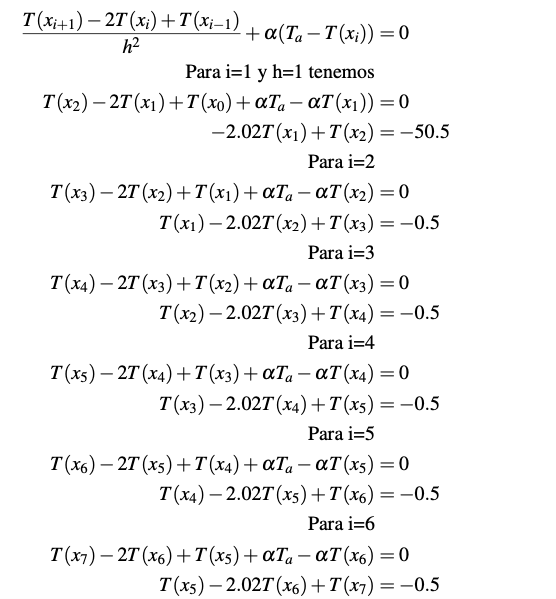

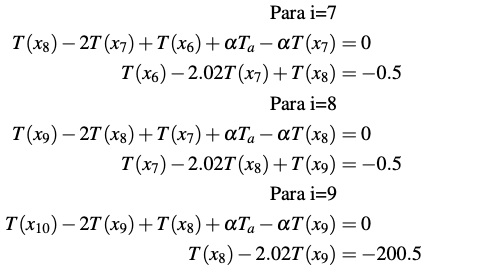

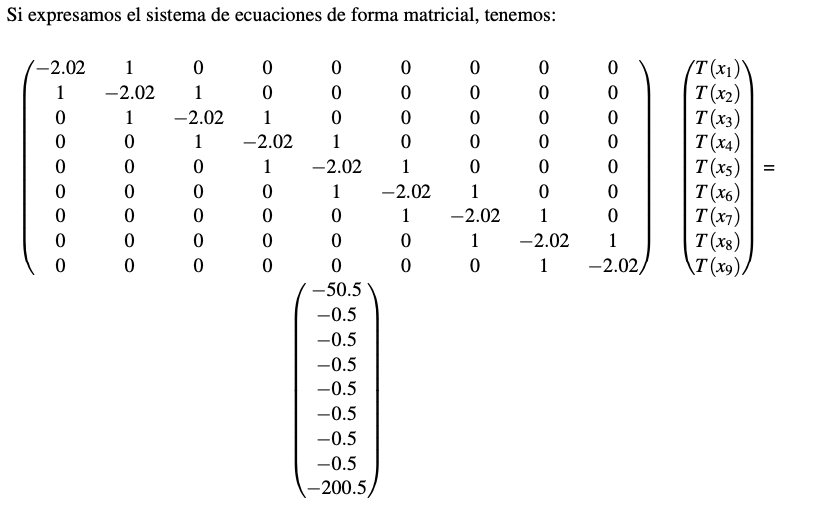

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def main():

  a=np.array([[-2.02,1,0,0,0,0,0,0,0],\
              [1,-2.02,1,0,0,0,0,0,0],\
              [0,1,-2.02,1,0,0,0,0,0],\
              [0,0,1,-2.02,1,0,0,0,0],\
              [0,0,0,1,-2.02,1,0,0,0],\
              [0,0,0,0,1,-2.02,1,0,0],\
              [0,0,0,0,0,1,-2.02,1,0],\
              [0,0,0,0,0,0,1,-2.02,1],\
              [0,0,0,0,0,0,0,1,-2.02]])
  b=np.array([-50.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-200.5])

  n,c =np.shape(a)

  r=np.linalg.matrix_rank(a)

  ab= np.c_[a,b]
  ra = np.linalg.matrix_rank(ab)
  print('rango(A)={} rango(Ab)={}  n={}'.format(r,ra,n))

  if(r==ra==n):
    print('solucion unica')
    x=np.linalg.solve(a,b) # Resuleve el sistema
    print(x)
    L=10 # Longitud de la barra
    n=10 # pasos
    T0 = 50 # Condición en la frontera lado izquierdo
    TL = 200 # Condición en la frontera lado derecho
    x_plot = np.linspace(0,L,n+1) # Vector de longitud de la barra
    y_plot=np.append([T0],x) #Agregar el lado izquierdo
    y_plot=np.append(y_plot,[TL]) # Agregar el lado derecho

    fig=plt.figure()
    plt.plot(x_plot,y_plot)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("Temperatura")
    plt.show()

    if(r==ra<n):
      print('multiples soluciones')

    if(r<ra):
      print('sin solucion')


if __main__ == "__main__": main()
rango(A)=9 rango(Ab)=9 n=9


SyntaxError: ignored

In [ ]:
# Definir los parámetros del problema
n = 5  # Número de divisiones en el eje x
m = 5  # Número de divisiones en el eje y
delta_x = 1.0  # Espaciado en el eje x
delta_y = 1.0  # Espaciado en el eje y

# Crear la matriz de temperaturas
temperaturas = [[0.0 for _ in range(m+2)] for _ in range(n+2)]

# Establecer las condiciones de frontera
for i in range(1, n+1):
    temperaturas[i][0] = 100.0  # Borde superior
    temperaturas[i][m+1] = 50.0  # Borde inferior
for j in range(1, m+1):
    temperaturas[0][j] = 50.0  # Borde izquierdo
    temperaturas[n+1][j] = 50.0  # Borde derecho

# Iterar hasta convergencia
epsilon = 1e-5  # Criterio de convergencia
convergencia = False
while not convergencia:
    max_diff = 0.0
    # Actualizar las temperaturas en el interior de la placa
    for i in range(1, n+1):
        for j in range(1, m+1):
            nueva_temperatura = (temperaturas[i-1][j] + temperaturas[i+1][j] +
                                 temperaturas[i][j-1] + temperaturas[i][j+1]) / 4
            diferencia = abs(nueva_temperatura - temperaturas[i][j])
            if diferencia > max_diff:
                max_diff = diferencia
            temperaturas[i][j] = nueva_temperatura
    # Verificar la convergencia
    if max_diff < epsilon:
        convergencia = True

# Imprimir la distribución de temperaturas
for i in range(1, n+1):
    for j in range(1, m+1):
        temperatura_redondeada = round(temperaturas[i][j], 2)
        print(f"U(x{i},y{j}) = {temperatura_redondeada} ºC")


U(x1,y1) = 73.43 ºC
U(x1,y2) = 62.28 ºC
U(x1,y3) = 56.73 ºC
U(x1,y4) = 53.59 ºC
U(x1,y5) = 51.57 ºC
U(x2,y1) = 81.46 ºC
U(x2,y2) = 68.94 ºC
U(x2,y3) = 61.06 ºC
U(x2,y4) = 56.06 ºC
U(x2,y5) = 52.67 ºC
U(x3,y1) = 83.47 ºC
U(x3,y2) = 70.96 ºC
U(x3,y3) = 62.5 ºC
U(x3,y4) = 56.92 ºC
U(x3,y5) = 53.07 ºC
U(x4,y1) = 81.46 ºC
U(x4,y2) = 68.94 ºC
U(x4,y3) = 61.06 ºC
U(x4,y4) = 56.06 ºC
U(x4,y5) = 52.67 ºC
U(x5,y1) = 73.43 ºC
U(x5,y2) = 62.28 ºC
U(x5,y3) = 56.73 ºC
U(x5,y4) = 53.59 ºC
U(x5,y5) = 51.57 ºC


In [ ]:
# Definir los parámetros del problema
n = 5  # Número de divisiones en el eje x
m = 5  # Número de divisiones en el eje y

# Crear la matriz de temperaturas
temperaturas = [[0.0 for _ in range(m+2)] for _ in range(n+2)]

# Establecer las condiciones de frontera
for i in range(1, n+1):
    temperaturas[i][0] = 100.0  # Borde superior
    temperaturas[i][m+1] = 0.0  # Borde inferior
for j in range(1, m+1):
    temperaturas[0][j] = 50.0  # Borde izquierdo
    temperaturas[n+1][j] = 50.0  # Borde derecho

# Realizar la discretización utilizando Gauss-Seidel
max_iteraciones = 1000  # Número máximo de iteraciones
tolerancia = 1e-5  # Tolerancia para la convergencia
iteracion = 0
convergencia = False

while not convergencia and iteracion < max_iteraciones:
    max_diff = 0.0
    for i in range(1, n+1):
        for j in range(1, m+1):
            nueva_temperatura = (temperaturas[i-1][j] + temperaturas[i+1][j] +
                                 temperaturas[i][j-1] + temperaturas[i][j+1]) / 4
            diferencia = abs(nueva_temperatura - temperaturas[i][j])
            if diferencia > max_diff:
                max_diff = diferencia
            temperaturas[i][j] = nueva_temperatura

    iteracion += 1

    if max_diff < tolerancia:
        convergencia = True

# Imprimir la distribución de temperaturas
for i in range(1, n+1):
    for j in range(1, m+1):
        temperatura_redondeada = round(temperaturas[i][j], 2)
        print(f"U(x{i},y{j}) = {temperatura_redondeada} ºC")


U(x1,y1) = 71.87 ºC
U(x1,y2) = 58.69 ºC
U(x1,y3) = 50.0 ºC
U(x1,y4) = 41.31 ºC
U(x1,y5) = 28.13 ºC
U(x2,y1) = 78.79 ºC
U(x2,y2) = 62.88 ºC
U(x2,y3) = 50.0 ºC
U(x2,y4) = 37.12 ºC
U(x2,y5) = 21.21 ºC
U(x3,y1) = 80.4 ºC
U(x3,y2) = 64.04 ºC
U(x3,y3) = 50.0 ºC
U(x3,y4) = 35.96 ºC
U(x3,y5) = 19.6 ºC
U(x4,y1) = 78.79 ºC
U(x4,y2) = 62.88 ºC
U(x4,y3) = 50.0 ºC
U(x4,y4) = 37.12 ºC
U(x4,y5) = 21.21 ºC
U(x5,y1) = 71.87 ºC
U(x5,y2) = 58.69 ºC
U(x5,y3) = 50.0 ºC
U(x5,y4) = 41.31 ºC
U(x5,y5) = 28.13 ºC


In [ ]:
# Definir los parámetros del problema
n = 5  # Número de divisiones en el eje x
m = 5  # Número de divisiones en el eje y
delta_x = 1.0  # Espaciado en el eje x
delta_y = 1.0  # Espaciado en el eje y

# Crear la matriz de temperaturas
temperaturas = [[0.0] * (m+2) for _ in range(n+2)]

# Establecer las condiciones de frontera
for i in range(1, n+1):
    temperaturas[i][0] = 100.0  # Borde superior
    temperaturas[i][m+1] = 0 # Borde inferior
for j in range(1, m+1):
    temperaturas[0][j] = 50.0  # Borde izquierdo
    temperaturas[n+1][j] = 50.0  # Borde derecho

# Iterar hasta convergencia
epsilon = 1e-5  # Criterio de convergencia
convergencia = False
while not convergencia:
    max_diff = 0.0
    # Actualizar las temperaturas en el interior de la placa
    for i in range(1, n+1):
        for j in range(1, m+1):
            nueva_temperatura = (temperaturas[i-1][j] + temperaturas[i+1][j] +
                                 temperaturas[i][j-1] + temperaturas[i][j+1]) / 4
            diferencia = abs(nueva_temperatura - temperaturas[i][j])
            if diferencia > max_diff:
                max_diff = diferencia
            temperaturas[i][j] = nueva_temperatura
    # Verificar la convergencia
    if max_diff < epsilon:
        convergencia = True



# Imprimir la distribución de temperaturas para las posiciones específicas
for i in range(2, 5):
    for j in range(2, 5):
        temperatura_redondeada = round(temperaturas[i][j], 2)
        print(f"U(x{i},y{j}) = {temperatura_redondeada} ºC")

print()
# Imprimir la distribución de temperaturas
for i in range(1, n+1):
    for j in range(1, m+1):
        temperatura_redondeada = round(temperaturas[i][j], 2)
        print(f"U(x{i},y{j}) = {temperatura_redondeada} ºC")

U(x1,y1) = 71.87 ºC
U(x1,y2) = 58.69 ºC
U(x1,y3) = 50.0 ºC
U(x1,y4) = 41.31 ºC
U(x1,y5) = 28.13 ºC
U(x2,y1) = 78.79 ºC
U(x2,y2) = 62.88 ºC
U(x2,y3) = 50.0 ºC
U(x2,y4) = 37.12 ºC
U(x2,y5) = 21.21 ºC
U(x3,y1) = 80.4 ºC
U(x3,y2) = 64.04 ºC
U(x3,y3) = 50.0 ºC
U(x3,y4) = 35.96 ºC
U(x3,y5) = 19.6 ºC
U(x4,y1) = 78.79 ºC
U(x4,y2) = 62.88 ºC
U(x4,y3) = 50.0 ºC
U(x4,y4) = 37.12 ºC
U(x4,y5) = 21.21 ºC
U(x5,y1) = 71.87 ºC
U(x5,y2) = 58.69 ºC
U(x5,y3) = 50.0 ºC
U(x5,y4) = 41.31 ºC
U(x5,y5) = 28.13 ºC

U(x2,y2) = 62.88 ºC
U(x2,y3) = 50.0 ºC
U(x2,y4) = 37.12 ºC
U(x3,y2) = 64.04 ºC
U(x3,y3) = 50.0 ºC
U(x3,y4) = 35.96 ºC
U(x4,y2) = 62.88 ºC
U(x4,y3) = 50.0 ºC
U(x4,y4) = 37.12 ºC


In [ ]:
# Definir los parámetros del problema
n = 5  # Número de divisiones en el eje x
m = 5  # Número de divisiones en el eje y
delta_x = 1.0  # Espaciado en el eje x
delta_y = 1.0  # Espaciado en el eje y

# Crear la matriz de temperaturas
temperaturas = [[0.0 for _ in range(m+2)] for _ in range(n+2)]

# Establecer las condiciones de frontera
for i in range(1, n+1):
    temperaturas[i][0] = 100.0  # Borde superior
    temperaturas[i][m+1] = 0.0  # Borde inferior
for j in range(1, m+1):
    temperaturas[0][j] = 50.0  # Borde izquierdo
    temperaturas[n+1][j] = 50.0  # Borde derecho

# Iterar hasta convergencia
epsilon = 1e-5  # Criterio de convergencia
convergencia = False
while not convergencia:
    max_diff = 0.0
    # Actualizar las temperaturas en el interior de la placa
    for i in range(1, n+1):
        for j in range(1, m+1):
            # Calcular la nueva temperatura promediando los valores de los vecinos
            nueva_temperatura = (temperaturas[i-1][j] + temperaturas[i+1][j] +
                                 temperaturas[i][j-1] + temperaturas[i][j+1]) / 4
            # Calcular la diferencia absoluta entre la nueva temperatura y la temperatura actual
            diferencia = abs(nueva_temperatura - temperaturas[i][j])
            # Actualizar la temperatura en la posición (i, j) de la matriz
            temperaturas[i][j] = nueva_temperatura
            # Actualizar el valor máximo de la diferencia
            if diferencia > max_diff:
                max_diff = diferencia
    # Verificar la convergencia
    if max_diff < epsilon:
        convergencia = True

# Imprimir la distribución de temperaturas
for i in range(1, n+1):
    for j in range(1, m+1):
        temperatura_redondeada = round(temperaturas[i][j], 2)
        print(f"U(x{i},y{j}) = {temperatura_redondeada} ºC")


U(x1,y1) = 71.87 ºC
U(x1,y2) = 58.69 ºC
U(x1,y3) = 50.0 ºC
U(x1,y4) = 41.31 ºC
U(x1,y5) = 28.13 ºC
U(x2,y1) = 78.79 ºC
U(x2,y2) = 62.88 ºC
U(x2,y3) = 50.0 ºC
U(x2,y4) = 37.12 ºC
U(x2,y5) = 21.21 ºC
U(x3,y1) = 80.4 ºC
U(x3,y2) = 64.04 ºC
U(x3,y3) = 50.0 ºC
U(x3,y4) = 35.96 ºC
U(x3,y5) = 19.6 ºC
U(x4,y1) = 78.79 ºC
U(x4,y2) = 62.88 ºC
U(x4,y3) = 50.0 ºC
U(x4,y4) = 37.12 ºC
U(x4,y5) = 21.21 ºC
U(x5,y1) = 71.87 ºC
U(x5,y2) = 58.69 ºC
U(x5,y3) = 50.0 ºC
U(x5,y4) = 41.31 ºC
U(x5,y5) = 28.13 ºC


In [ ]:
def gauss_seidel_iteration(n, a, b, x, M):
    iteraciones = []
    for k in range(1, M+1):
        for i in range(n):
            sum_term = 0
            for j in range(n):
                if j != i:
                    sum_term += a[i][j] * x[j]
            x[i] = (b[i] - sum_term) / a[i][i]

        print(f"Iteración {k}: {x}")
        iteraciones.append((k, x.copy()))

    return iteraciones


# Definir los parámetros del problema
n = 5  # Número de divisiones en el eje x
m = 5  # Número de divisiones en el eje y

# Crear la matriz de coeficientes 'a' y el vector de constantes 'b'
a = [[0.0 for _ in range(n)] for _ in range(n)]
b = [0.0 for _ in range(n)]

# Inicializar la solución inicial 'x' con valores de temperatura de 50ºC en los bordes izquierdo y derecho
x = [50.0 for _ in range(n)]

# Establecer las condiciones de frontera y los coeficientes en la matriz 'a' y el vector 'b'
for i in range(n):
    for j in range(n):
        if i == j:
            a[i][j] = -4.0
        elif abs(i - j) == 1:
            a[i][j] = 1.0

# Establecer las condiciones de frontera en el vector 'b'
b[0] = -50.0
b[n-1] = -50.0

# Realizar las iteraciones de Gauss-Seidel
iteraciones = gauss_seidel_iteration(n, a, b, x, M=10)

# Imprimir la distribución de temperaturas obtenida
for iteracion in iteraciones:
    k, temperatura = iteracion
    print(f"Iteración {k}: {temperatura}")


Iteración 1: [25.0, 18.75, 17.1875, 16.796875, 16.69921875]
Iteración 2: [17.1875, 8.59375, 6.34765625, 5.76171875, 13.9404296875]
Iteración 3: [14.6484375, 5.2490234375, 2.752685546875, 4.17327880859375, 13.543319702148438]
Iteración 4: [13.812255859375, 4.1412353515625, 2.0786285400390625, 3.905487060546875, 13.476371765136719]
Iteración 5: [13.535308837890625, 3.903484344482422, 1.9522428512573242, 3.8571536540985107, 13.464288413524628]
Iteración 6: [13.475871086120605, 3.8570284843444824, 1.9285455346107483, 3.848208487033844, 13.462052121758461]
Iteración 7: [13.46425712108612, 3.8482006639242172, 1.9241022877395153, 3.846538602374494, 13.461634650593624]
Iteración 8: [13.462050165981054, 3.8465381134301424, 1.9232691789511591, 3.8462259573861957, 13.461556489346549]
Iteración 9: [13.461634528357536, 3.8462259268271737, 1.9231129710533423, 3.846167365099973, 13.461541841274993]
Iteración 10: [13.461556481706793, 3.846167363190034, 1.9230836820725017, 3.8461563808368737, 13.461539

In [ ]:
def metodo_jacobi(n, a, b, x, M):
    """
    Método de Jacobi para resolver sistemas de ecuaciones lineales.

    Parámetros:
    - n: número de variables en el sistema de ecuaciones
    - a: matriz de coeficientes de tamaño nxn (una lista de listas)
    - b: vector de términos independientes de tamaño n
    - x: vector de valores iniciales de las variables de tamaño n
    - M: número máximo de iteraciones

    Retorna:
    - iteraciones: lista de tuplas (k, x) con las iteraciones del algoritmo
    """
    iteraciones = []
    for k in range(1, M+1):
        u = [0] * n  # Vector temporal para almacenar los nuevos valores de x

        # Calcula los nuevos valores de x
        for i in range(n):
            sumatoria = 0
            for j in range(n):
                if j != i:
                    sumatoria += a[i][j] * x[j]
            u[i] = (b[i] - sumatoria) / a[i][i]

        # Actualiza los valores de x con los nuevos valores obtenidos
        for i in range(n):
            x[i] = round(u[i], 4)

        iteraciones.append((k, x.copy()))
        print(f"Iteración {k}:")
        print(f"Valores aprox. de las variables: {x}")
        print(" ")

    return iteraciones


# Definir los parámetros del problema
n = 5  # Número de divisiones en el eje x
m = 5  # Número de divisiones en el eje y

# Crear la matriz de coeficientes 'a' y el vector de constantes 'b'
a = [[0.0 for _ in range(n)] for _ in range(n)]
b = [0.0 for _ in range(n)]

# Inicializar la solución inicial 'x' con valores de temperatura de 50ºC en los bordes izquierdo y derecho
x = [50.0 for _ in range(n)]

# Establecer las condiciones de frontera y los coeficientes en la matriz 'a' y el vector 'b'
for i in range(n):
    for j in range(n):
        if i == j:
            a[i][j] = -4.0
        elif abs(i - j) == 1:
            a[i][j] = 1.0

# Establecer las condiciones de frontera en el vector 'b'
b[0] = -50.0
b[n-1] = -50.0

# Realizar las iteraciones de Jacobi
iteraciones = metodo_jacobi(n, a, b, x, M=10)

# Imprimir la distribución de temperaturas obtenida
for iteracion in iteraciones:
    k, temperatura = iteracion
    print(f"Iteración {k}: {temperatura}")


Iteración 1:
Valores aprox. de las variables: [25.0, 25.0, 25.0, 25.0, 25.0]
 
Iteración 2:
Valores aprox. de las variables: [18.75, 12.5, 12.5, 12.5, 18.75]
 
Iteración 3:
Valores aprox. de las variables: [15.625, 7.8125, 6.25, 7.8125, 15.625]
 
Iteración 4:
Valores aprox. de las variables: [14.4531, 5.4688, 3.9062, 5.4688, 14.4531]
 
Iteración 5:
Valores aprox. de las variables: [13.8672, 4.5898, 2.7344, 4.5898, 13.8672]
 
Iteración 6:
Valores aprox. de las variables: [13.6474, 4.1504, 2.2949, 4.1504, 13.6474]
 
Iteración 7:
Valores aprox. de las variables: [13.5376, 3.9856, 2.0752, 3.9856, 13.5376]
 
Iteración 8:
Valores aprox. de las variables: [13.4964, 3.9032, 1.9928, 3.9032, 13.4964]
 
Iteración 9:
Valores aprox. de las variables: [13.4758, 3.8723, 1.9516, 3.8723, 13.4758]
 
Iteración 10:
Valores aprox. de las variables: [13.4681, 3.8568, 1.9362, 3.8568, 13.4681]
 
Iteración 1: [25.0, 25.0, 25.0, 25.0, 25.0]
Iteración 2: [18.75, 12.5, 12.5, 12.5, 18.75]
Iteración 3: [15.625, 7.8